<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/main/07-Paddy/Nb_07_paddy_data_lvl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving 2021_2022 Maha.csv to 2021_2022 Maha.csv


In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [4]:
df = pd.read_csv('2021_2022 Maha.csv')

In [5]:
df

,District,Major_Schemes_Sown,Minor_Schemes_Sown,Rainfed_Sown,All_Schemes_Sown,Major_Schemes_Harvested,Minor_Schemes_Harvested,Rainfed_Harvested,All_Schemes_Harvested,Major_Schemes_Yield,Minor_Schemes_Yield,Rainfed_Yield,Average_Yield,Nett_Extent_Harvested,Total_Production
0,COLOMBO,324,710,2796,3830,324,710,2777,3811,3321,2236,2500,2521,3239,8166
1,GAMPAHA,1659,3076,6776,11511,1556,3036,6610,11202,2056,2671,3105,2842,9522,27059
2,KALUTARA,145,1573,10221,11939,129,1544,9893,11566,3716,2341,2583,2563,10669,27349
3,KANDY,4268,5181,2762,12211,4268,5176,2757,12201,3092,3190,3540,3235,9649,31211
4,MATALE,7628,7839,4525,19992,7593,7815,4512,19920,3089,3601,3304,3339,17914,59812
5,NUWARAELIYA,900,4133,11,5044,900,4126,8,5034,4652,3763,3870,3922,2836,11126
6,GALLE,144,1756,9335,11235,144,1706,9071,10921,2653,2825,2453,2514,8546,21486
7,MATARA,4259,3193,6233,13685,4105,2963,6110,13178,3149,2625,2573,2764,10404,28761
8,HAMBANTOTA,29498,5463,1143,36104,29438,5438,1131,36007,4144,3180,3202,3969,31459,124870
9,JAFFNA,-,-,11127,11127,-,-,7775,7775,-,-,2176,2176,6899,15013


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   District                 26 non-null     object
 1   Major_Schemes_Sown       26 non-null     object
 2   Minor_Schemes_Sown       26 non-null     object
 3   Rainfed_Sown             26 non-null     int64 
 4   All_Schemes_Sown         26 non-null     int64 
 5   Major_Schemes_Harvested  26 non-null     object
 6   Minor_Schemes_Harvested  26 non-null     object
 7   Rainfed_Harvested        26 non-null     int64 
 8   All_Schemes_Harvested    26 non-null     int64 
 9   Major_Schemes_Yield      26 non-null     object
 10  Minor_Schemes_Yield      26 non-null     object
 11  Rainfed_Yield            26 non-null     int64 
 12  Average_Yield            26 non-null     int64 
 13  Nett_Extent_Harvested    26 non-null     int64 
 14  Total_Production         26 non-null     int

In [7]:
df.describe()

,Rainfed_Sown,All_Schemes_Sown,Rainfed_Harvested,All_Schemes_Harvested,Rainfed_Yield,Average_Yield,Nett_Extent_Harvested,Total_Production
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01
mean,16662.692308,59680.461538,16195.076923,58934.461538,2589.153846,2853.038462,52704.923077,1.485562e+05
std,41683.252438,148837.309992,40547.692147,147041.177843,633.483303,524.696749,131493.600610,3.711223e+05
min,11.000000,3830.000000,8.000000,3811.000000,1304.000000,1639.000000,2836.000000,8.166000e+03
25%,2770.500000,12007.000000,2762.000000,11724.750000,2173.000000,2515.750000,9837.750000,2.770200e+04
50%,6504.500000,20229.000000,6360.000000,19874.000000,2549.000000,2847.500000,18310.500000,4.719300e+04
75%,13029.750000,38763.500000,12982.750000,38723.500000,3029.500000,3197.500000,35987.250000,9.954775e+04
max,216615.000000,775846.000000,210536.000000,766148.000000,3870.000000,3969.000000,685164.000000,1.931230e+06


# MI -Mutual Information

In [9]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Copy data (safe practice)
df_clean = df.copy()

# Columns that should be numeric but are object
object_numeric_cols = [
    'Major_Schemes_Sown',
    'Minor_Schemes_Sown',
    'Major_Schemes_Harvested',
    'Minor_Schemes_Harvested',
    'Major_Schemes_Yield',
    'Minor_Schemes_Yield'
]

# Remove commas and convert to numeric
for col in object_numeric_cols:
    df_clean[col] = (
        df_clean[col]
        .astype(str)
        .str.replace(',', '', regex=True)
    )
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Drop District (categorical, non-numeric)
df_clean = df_clean.drop(columns=['District'])

# Handle missing values (important for MI)
df_clean = df_clean.fillna(df_clean.median())



In [10]:
X = df_clean.drop('Total_Production', axis=1)
y = df_clean['Total_Production']

mi = mutual_info_regression(X, y, random_state=42)

mi_df = (
    pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi})
    .sort_values(by='Mutual_Information', ascending=False)
)

print(mi_df)


                    Feature  Mutual_Information
12    Nett_Extent_Harvested            1.334249
7     All_Schemes_Harvested            1.331059
3          All_Schemes_Sown            1.200938
0        Major_Schemes_Sown            0.591412
4   Major_Schemes_Harvested            0.588452
6         Rainfed_Harvested            0.167379
5   Minor_Schemes_Harvested            0.153949
1        Minor_Schemes_Sown            0.133803
2              Rainfed_Sown            0.132391
11            Average_Yield            0.065923
8       Major_Schemes_Yield            0.012142
10            Rainfed_Yield            0.000000
9       Minor_Schemes_Yield            0.000000


# Corr

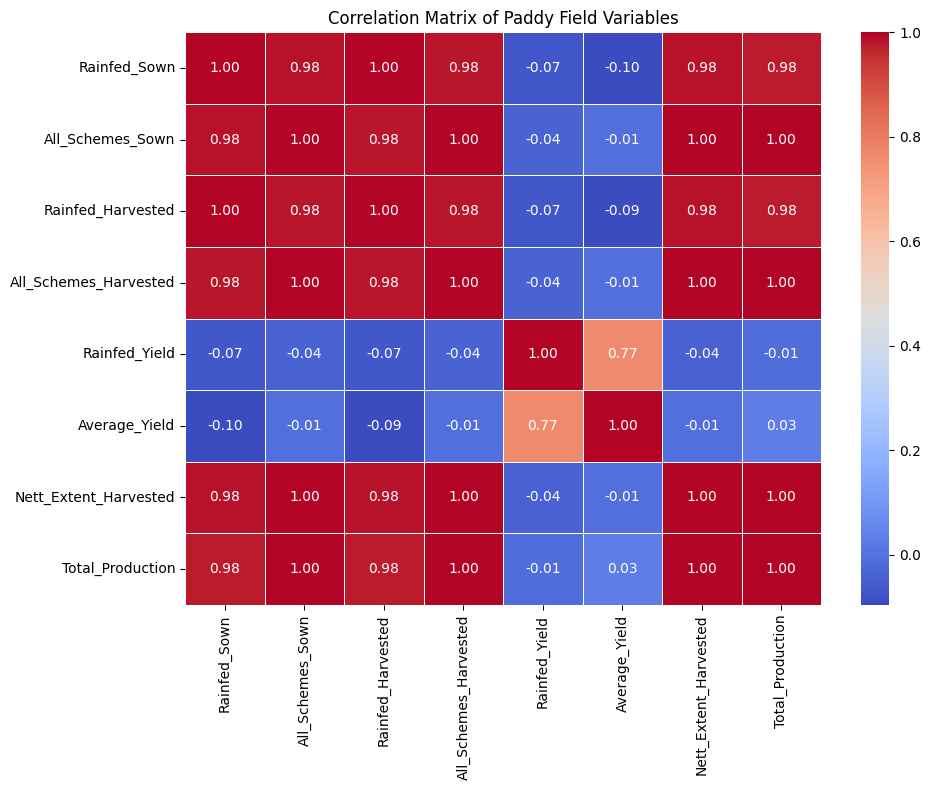

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Matrix of Paddy Field Variables")
plt.tight_layout()
plt.show()


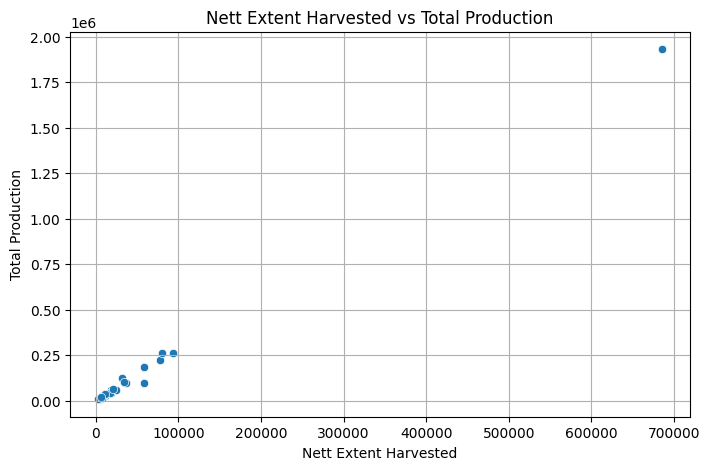

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Nett_Extent_Harvested',
    y='Total_Production'
)

plt.xlabel("Nett Extent Harvested")
plt.ylabel("Total Production")
plt.title("Nett Extent Harvested vs Total Production")
plt.grid(True)
plt.show()


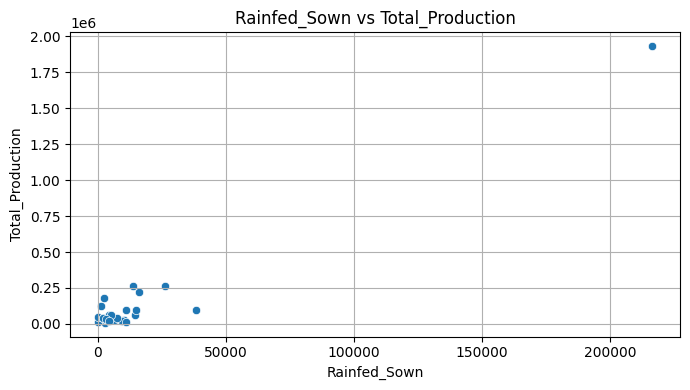

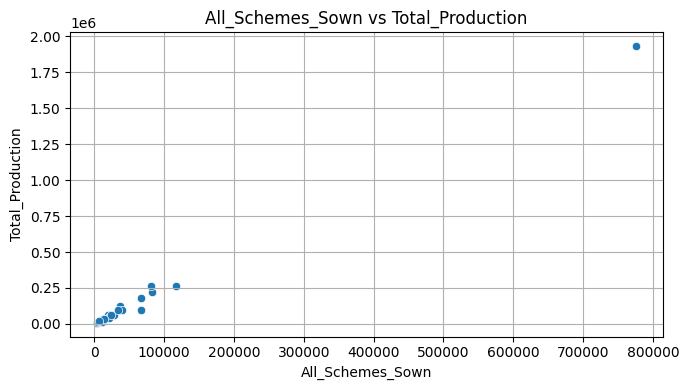

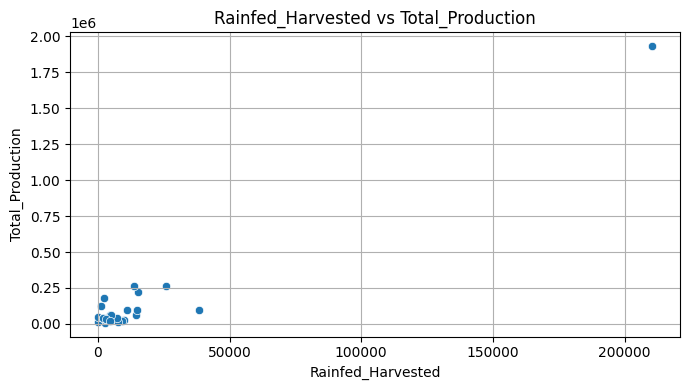

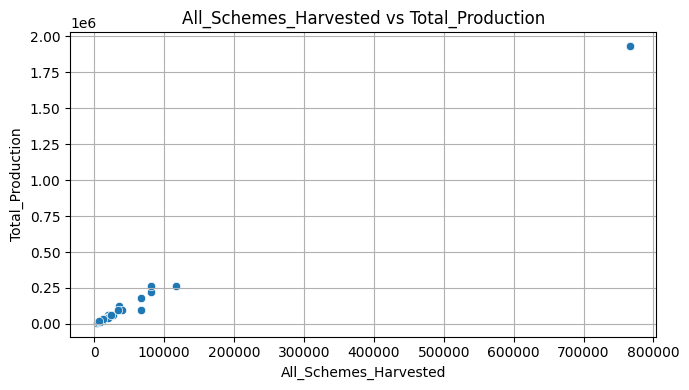

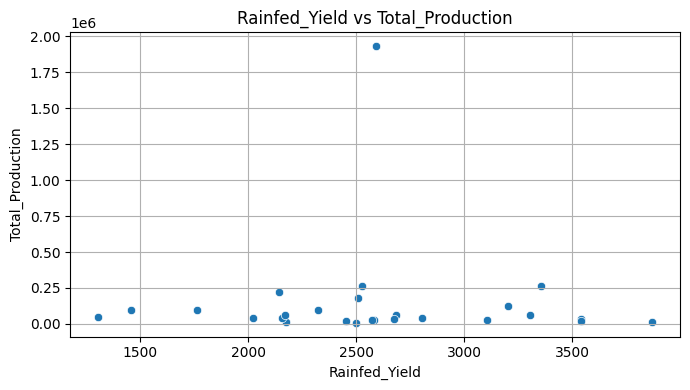

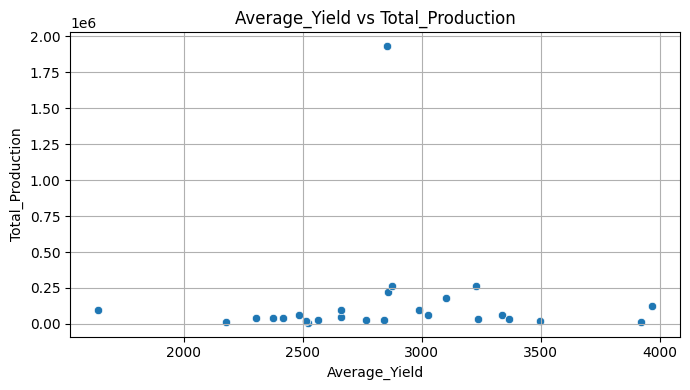

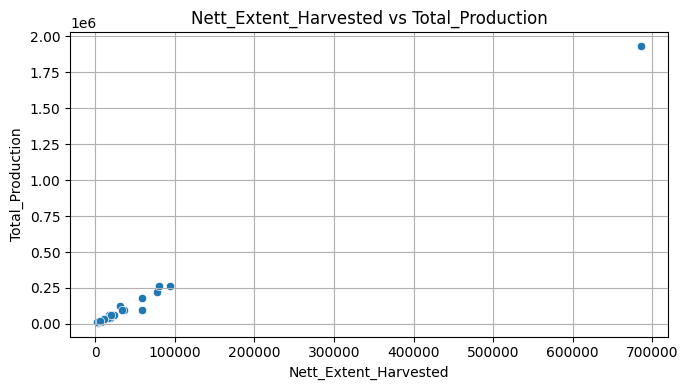

In [13]:
target = 'Total_Production'
features = numeric_df.columns.drop(target)

for feature in features:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=df, x=feature, y=target)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


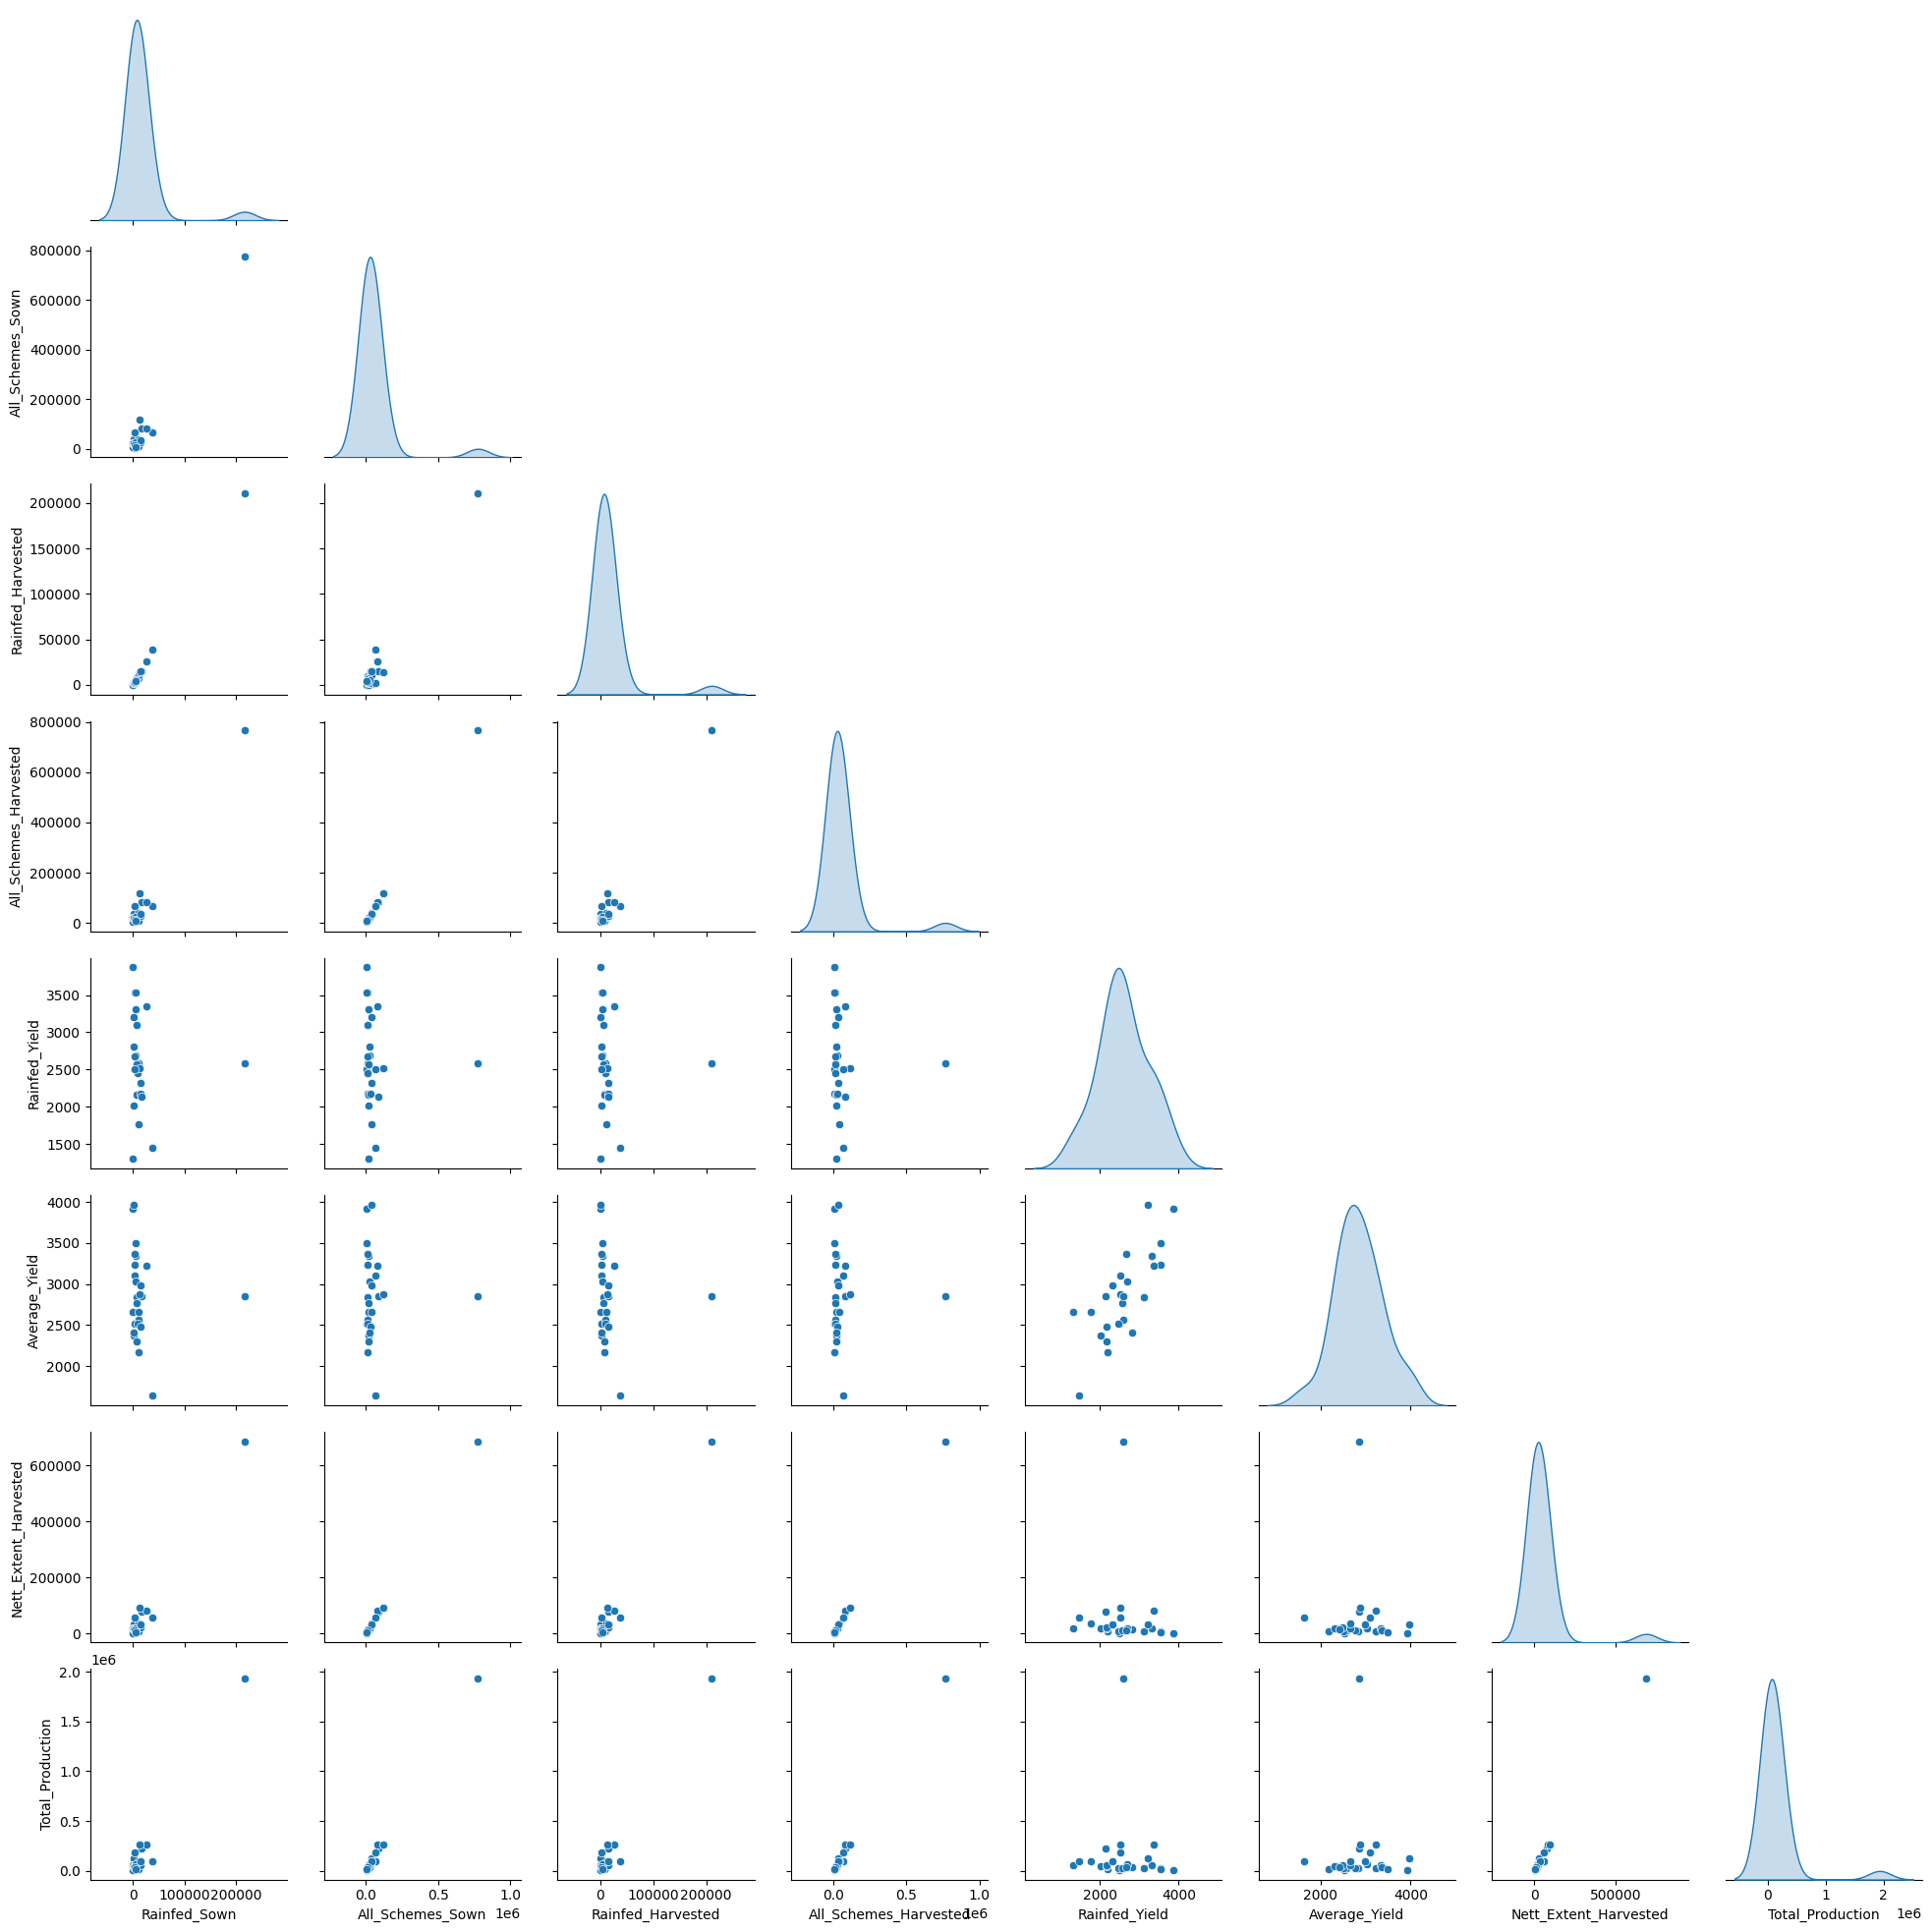

In [14]:
sns.pairplot(
    numeric_df,
    diag_kind="kde",
    corner=True
)
plt.show()


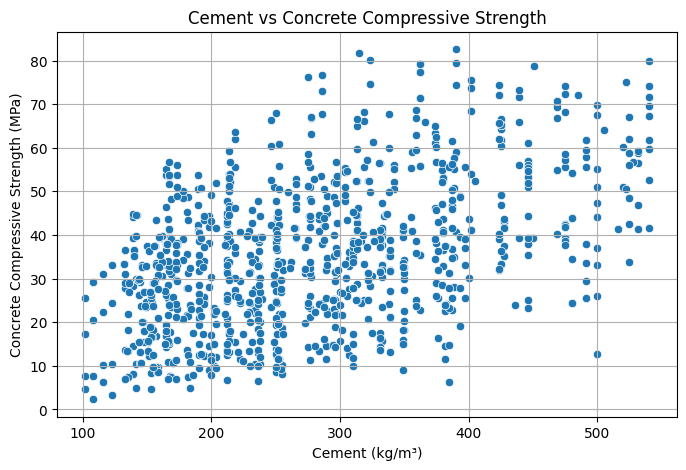

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Cement vs Concrete compressive strength
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Cement', y='Concrete compressive strength ')
plt.xlabel("Cement (kg/m³)")
plt.ylabel("Concrete Compressive Strength (MPa)")
plt.title("Cement vs Concrete Compressive Strength")
plt.grid(True)
plt.show()


# Partial Dependennce

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


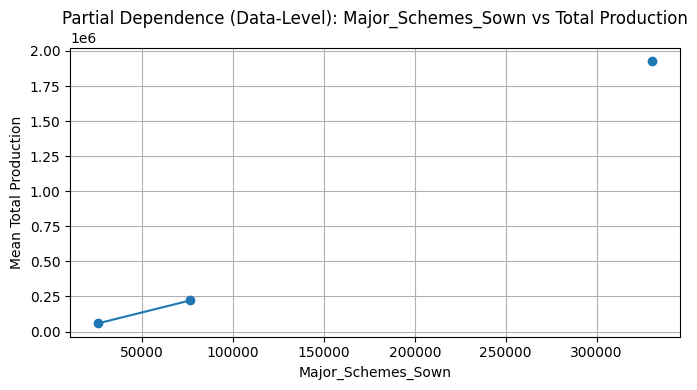

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


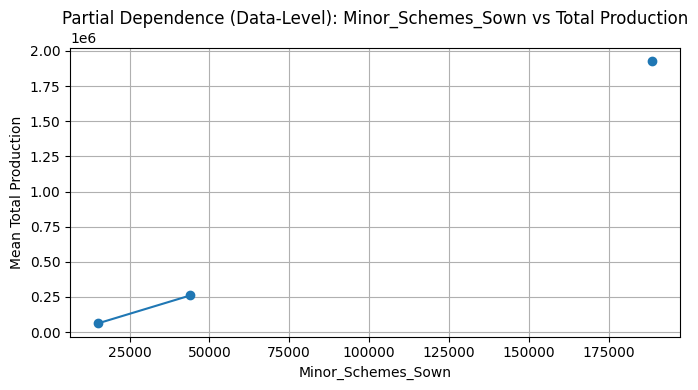

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


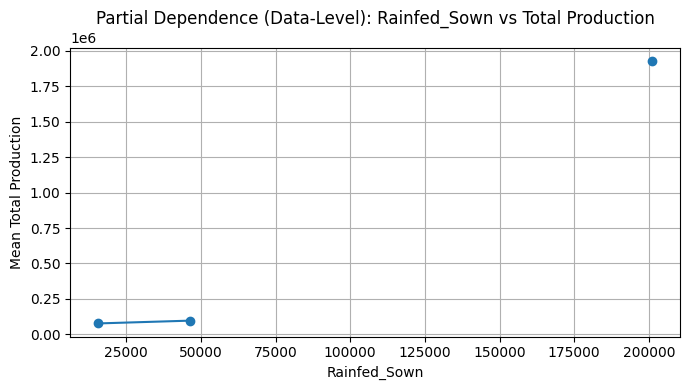

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


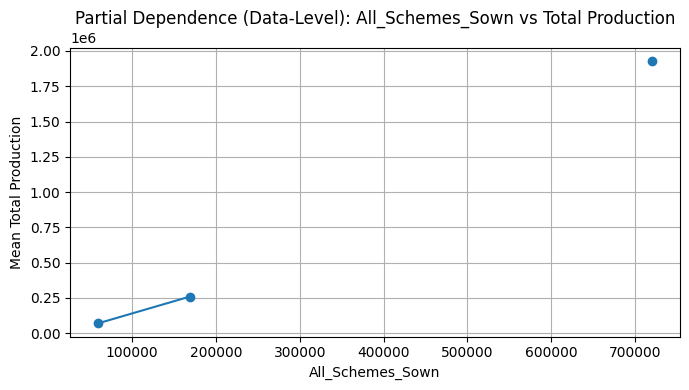

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


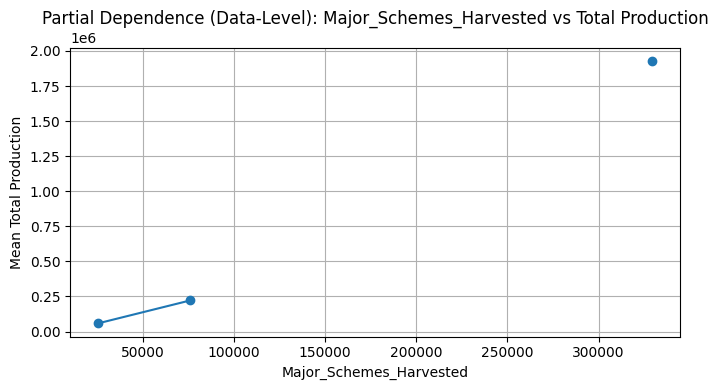

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


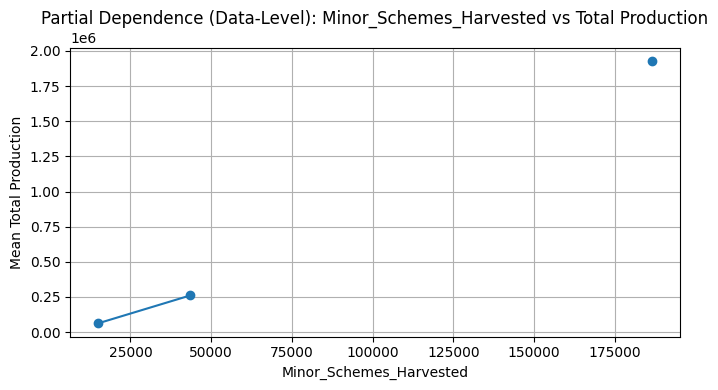

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


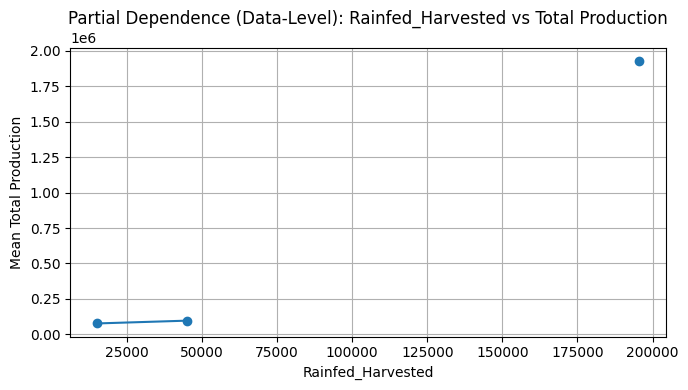

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


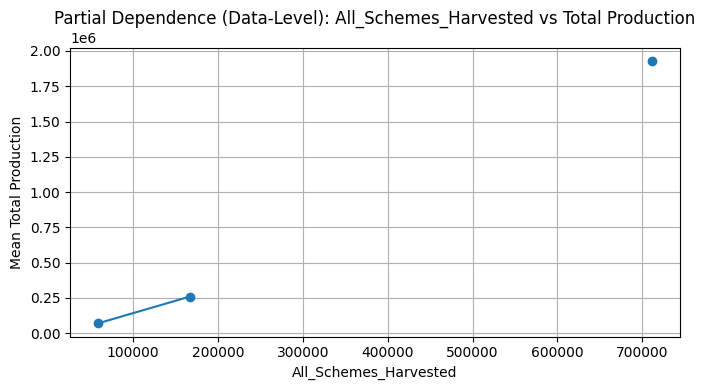

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


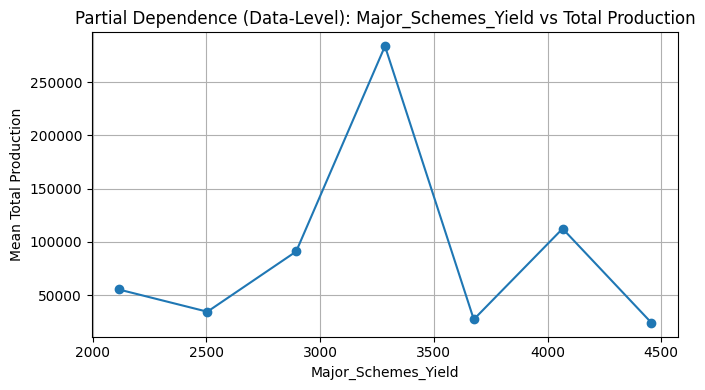

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


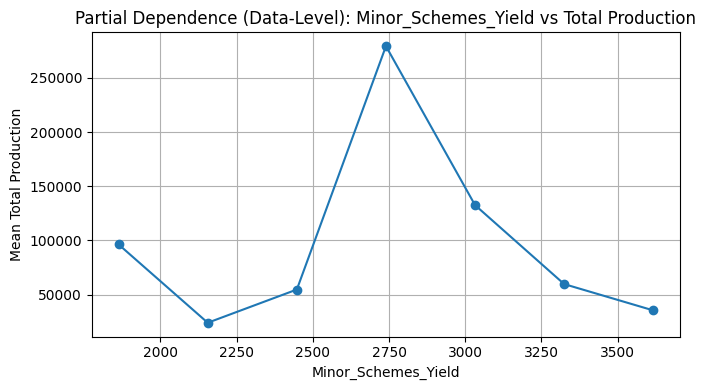

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


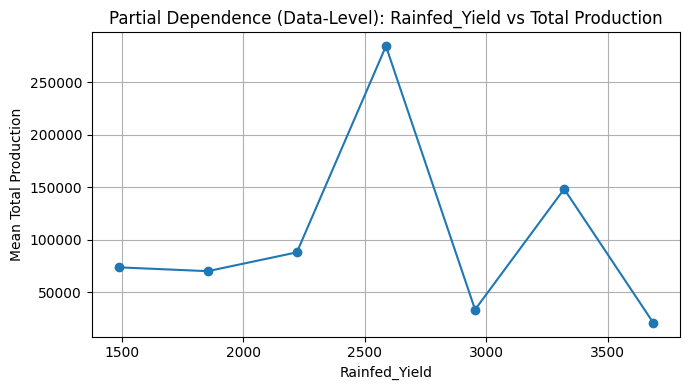

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


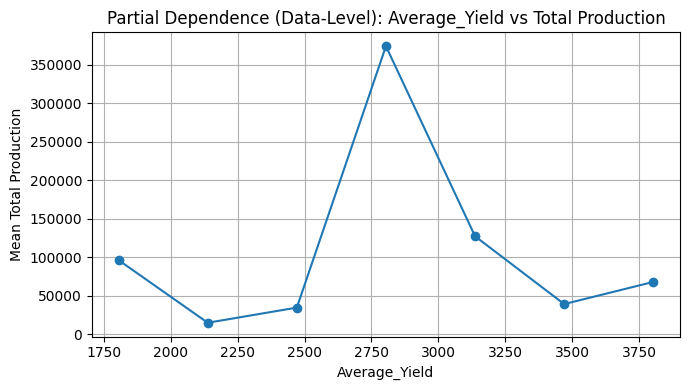

/tmp/ipython-input-353464337.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


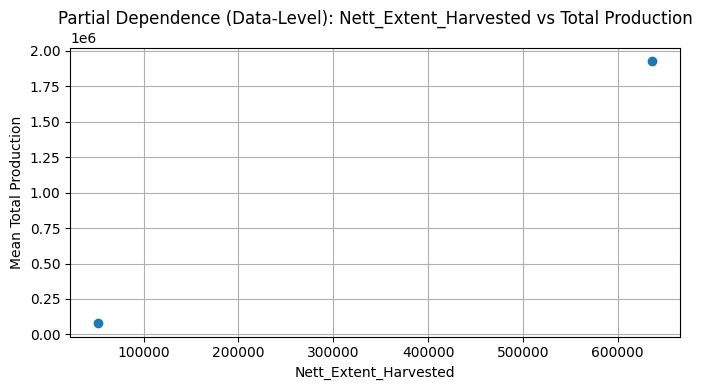

In [19]:
import numpy as np
import matplotlib.pyplot as plt

target = 'Total_Production'
numeric_features = df_clean.select_dtypes(include=['int64', 'float64']).columns.drop(target)

num_bins = 8  # recommended for small dataset

for feature in numeric_features:
    temp_df = df_clean[[feature, target]].dropna().copy()

    # Create bin edges (must be monotonically increasing)
    bin_edges = np.linspace(
        temp_df[feature].min(),
        temp_df[feature].max(),
        num_bins
    )

    # Assign bins correctly
    temp_df['bin'] = pd.cut(
        temp_df[feature],
        bins=bin_edges,
        include_lowest=True
    )

    # Mean target per bin
    mean_production = temp_df.groupby('bin')[target].mean()
    bin_centers = [interval.mid for interval in mean_production.index]

    # Plot
    plt.figure(figsize=(7, 4))
    plt.plot(bin_centers, mean_production.values, marker='o')
    plt.xlabel(feature)
    plt.ylabel("Mean Total Production")
    plt.title(f"Partial Dependence (Data-Level): {feature} vs Total Production")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
